In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import tensorflow as tf
import mlflow
import mlflow.tensorflow
import joblib
import tensorflow as tf
from fastapi import FastAPI
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from mlflow.models.signature import infer_signature




import warnings
warnings.filterwarnings('ignore')

file=r"C:\Users\ushas\OneDrive\Desktop\SKOVDE\sem 1\Data Science\DS25-AS2-a25ushba.ipynb\energy_efficiency_data.csv"
df=pd.read_csv(file)

df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [51]:
print("Shape:", df.shape)
df.info()
df.isnull().sum().sort_values(ascending=False).head(20)


Shape: (768, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_Area_Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling_Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [53]:
X = df.drop(columns=["Heating_Load", "Cooling_Load"])
y = df["Heating_Load"] 

#Train-Test Split & Feature Scaling

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

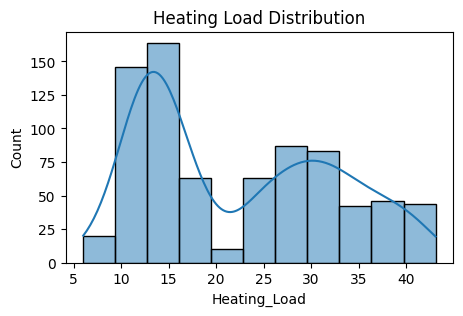

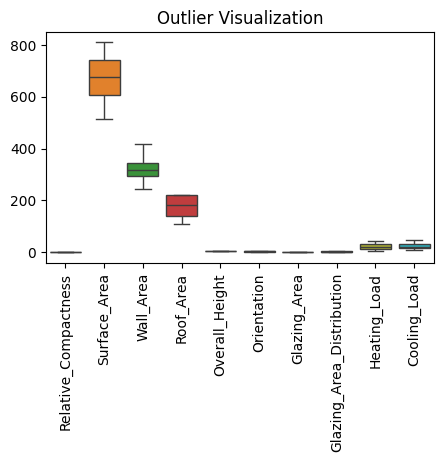

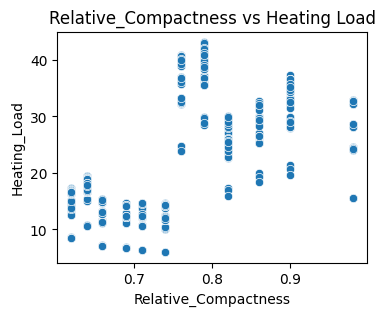

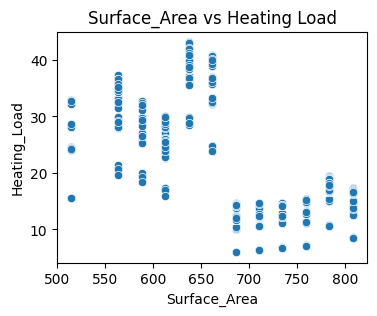

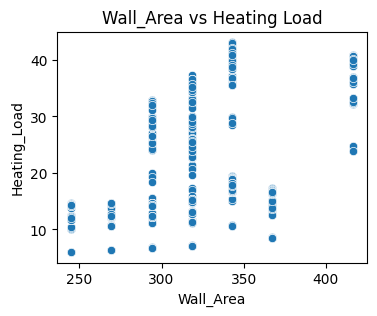

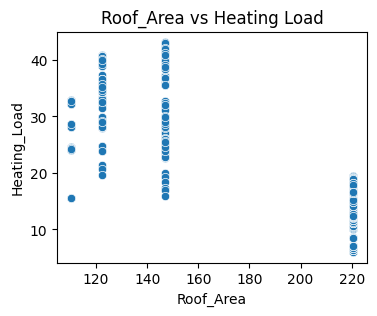

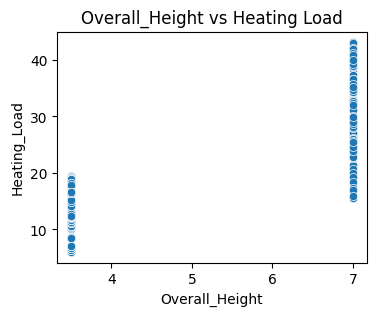

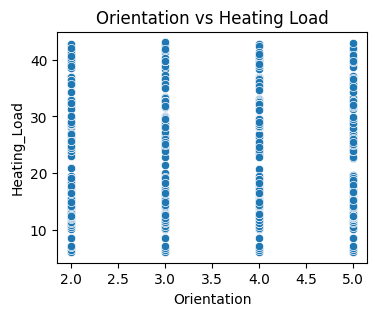

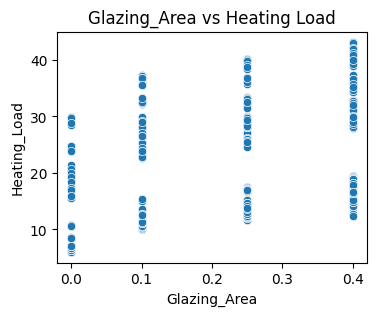

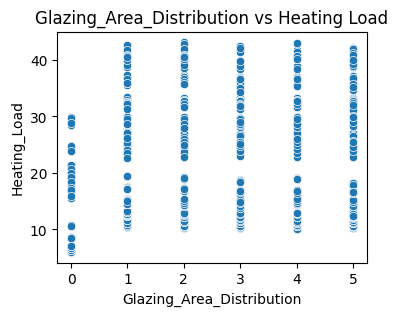

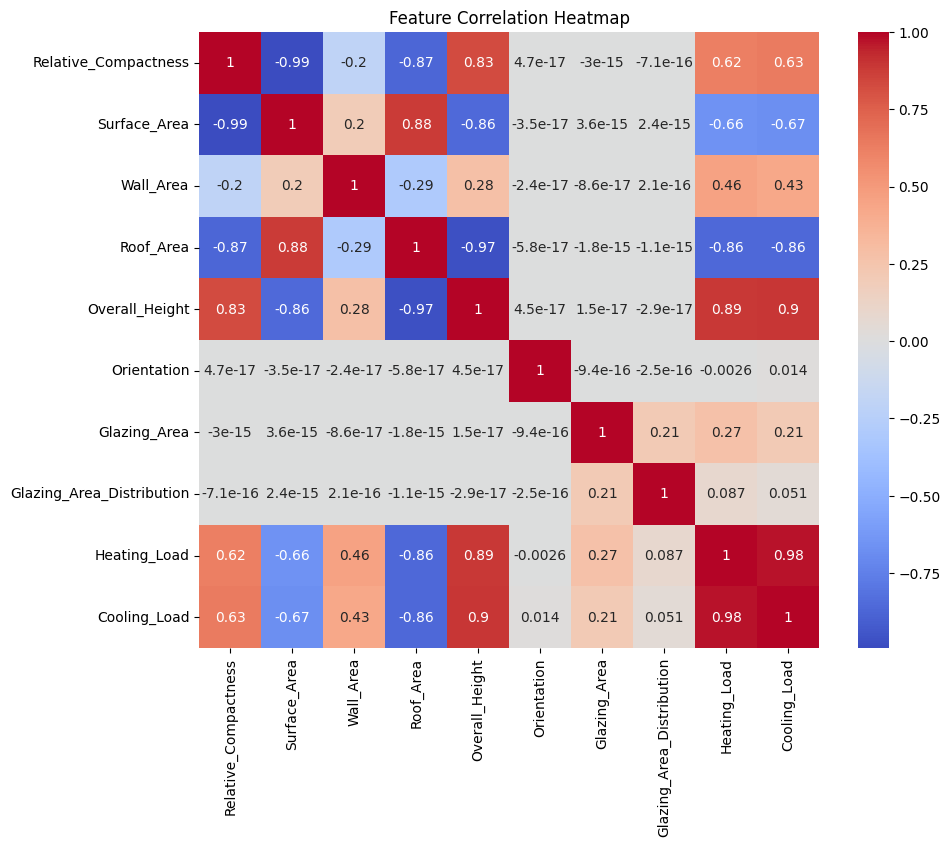

In [54]:
#Target distribution
plt.figure(figsize=(5,3))
sns.histplot(df["Heating_Load"], kde=True)
plt.title("Heating Load Distribution")
plt.show()

#outlier detection
plt.figure(figsize=(5,3))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Outlier Visualization")
plt.show()

#visualization between features & targets
for col in X.columns:
    plt.figure(figsize=(4,3))
    sns.scatterplot(x=df[col], y=y)
    plt.title(f"{col} vs Heating Load")
    plt.show()

#correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [55]:
#Model Training & Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MSE": mse,
        "R2": r2
    }

for model, metrics in results.items():
    print(f"\n{model}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"R2 Score: {metrics['R2']:.4f}")

best_model = min(results, key=lambda x: results[x]["MSE"])
print("\nBest Model:", best_model)



Linear Regression
MSE: 9.1532
R2 Score: 0.9122

Ridge Regression
MSE: 9.2138
R2 Score: 0.9116

Lasso Regression
MSE: 9.2244
R2 Score: 0.9115

Best Model: Linear Regression


In [56]:
#Predictions on test data
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

predictions = ridge_model.predict(X_test_scaled)

for i in range(5):
    print(f"Actual: {y_test.iloc[i]:.2f} | Predicted: {predictions[i]:.2f}")


Actual: 16.47 | Predicted: 19.06
Actual: 13.17 | Predicted: 14.04
Actual: 32.82 | Predicted: 31.50
Actual: 41.32 | Predicted: 35.83
Actual: 16.69 | Predicted: 15.43


In [57]:
#future observation prediction
# Example new building data
new_data = [[
    0.98,    # Relative Compactness
    514.5,   # Surface Area
    294.0,   # Wall Area
    110.25,  # Roof Area
    7,       # Overall Height
    2,       # Orientation
    0.0,     # Glazing Area
    0        # Glazing Area Distribution
]]

new_data_scaled = scaler.transform(new_data)
future_prediction = ridge_model.predict(new_data_scaled)

print("Predicted Heating Load:", future_prediction[0])

Predicted Heating Load: 22.81303098371196


### 2.c. Recommendations for Future Observations
Based on model behavior:
Relative Compactness has strong influence on heating load

Higher surface area → higher energy consumption

Ridge Regression is recommended due to:

Better generalization,
Reduced overfitting,
Stable coefficients.

In [58]:
#building neural network model
def create_model(learning_rate=0.001):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model

#train neural network
nn_model = create_model()

history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

#NN evaluation
nn_predictions = nn_model.predict(X_test_scaled)

nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

print("Neural Network MSE:", nn_mse)
print("Neural Network R2:", nn_r2)

#comparison
print("\nModel Comparison")
print(f"Linear Regression MSE: {results['Linear Regression']['MSE']:.4f}")
print(f"Ridge Regression MSE: {results['Ridge Regression']['MSE']:.4f}")
print(f"Neural Network MSE: {nn_mse:.4f}")



Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 588.8278 - mae: 21.9751 - val_loss: 510.2846 - val_mae: 20.4034
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 545.2928 - mae: 20.9382 - val_loss: 466.2948 - val_mae: 19.2435
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 492.3521 - mae: 19.5656 - val_loss: 408.3325 - val_mae: 17.6026
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 421.0492 - mae: 17.6101 - val_loss: 331.2444 - val_mae: 15.3296
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 330.2416 - mae: 15.0197 - val_loss: 238.5036 - val_mae: 12.4827
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 223.4420 - mae: 11.7992 - val_loss: 143.3778 - val_mae: 9.1547
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 125.9040 - mae: 8.3774 - val_loss: 69.3096 - val_mae: 5.9282
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 59.4906 - mae: 5.6017 - val_loss: 39.5677 - val_mae: 4.6242
Epoch 9/100
16/16 ━━━

In [59]:
mlflow.set_experiment("Neural_Network_Regression")

#Log Parameters & Metrics
with mlflow.start_run():
    
    mlflow.log_param("epochs", 100)
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("optimizer", "Adam")
    mlflow.log_param("learning_rate", 0.001)
    
    mlflow.log_metric("MSE", nn_mse)
    mlflow.log_metric("R2", nn_r2)
    
    mlflow.tensorflow.log_model(nn_model, "neural_network_model")


2025/12/15 20:21:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/15 20:21:55 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


In [60]:
#hyperparameter tuning using Gridsearchcv
keras_model = KerasRegressor(
    build_fn=create_model,
    verbose=0
)
param_grid = {
    "batch_size": [16, 32],
    "epochs": [50, 100],
    "model__learning_rate": [0.001, 0.01],
}
grid = GridSearchCV(
    estimator=keras_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3
)

grid_result = grid.fit(X_train_scaled, y_train)
print("Best MSE:", -grid_result.best_score_)
print("Best Parameters:", grid_result.best_params_)
best_nn = grid_result.best_estimator_

best_predictions = best_nn.predict(X_test_scaled)

best_mse = mean_squared_error(y_test, best_predictions)
best_r2 = r2_score(y_test, best_predictions)

print("Tuned NN MSE:", best_mse)
print("Tuned NN R2:", best_r2)

def build_model(learning_rate=0.001):
    model = Sequential([
        Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(32, activation="relu"),
        Dense(1)
    ])
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="mse"
    )
    return model

    keras_model = KerasRegressor(
    model=build_model,
    epochs=50,
    batch_size=16,
    verbose=0
)

param_grid = {
    "model__learning_rate": [0.001, 0.01],
    "epochs": [50, 100],
    "batch_size": [16, 32]
}

grid = GridSearchCV(
    estimator=keras_model,
    param_grid=param_grid,
    cv=3,
    scoring="neg_mean_squared_error"
)


Best MSE: 0.5532813645497573
Best Parameters: {'batch_size': 16, 'epochs': 100, 'model__learning_rate': 0.01}
Tuned NN MSE: 0.5784064610838079
Tuned NN R2: 0.9944507544746198


In [62]:
#Save Trained Model & Scaler
best_nn = grid_result.best_estimator_
trained_model = best_nn.model_

trained_model.save("nn_energy_model.keras")


import joblib
joblib.dump(scaler, "scaler.pkl")

#Predict on Unseen Data (Before Deployment)
# Example unseen building data
unseen_data = [[
    0.85,     # Relative Compactness
    600.0,    # Surface Area
    300.0,    # Wall Area
    120.0,    # Roof Area
    7.0,      # Overall Height
    3,        # Orientation
    0.1,      # Glazing Area
    2         # Glazing Area Distribution
]]

unseen_scaled = scaler.transform(unseen_data)
prediction = best_nn.predict(unseen_scaled)

print("Predicted Heating Load:", prediction[0])



Predicted Heating Load: 24.431664


In [ ]:
#create app.py
from fastapi import FastAPI
import numpy as np
import tensorflow as tf
import joblib

app = FastAPI(title="Energy Efficiency Prediction API")

# Load model & scaler
model = tf.keras.models.load_model("nn_energy_model.keras")
scaler = joblib.load("scaler.pkl")

@app.post("/predict")
def predict(features: list):
    """
    Input: List of 8 numerical features
    Output: Predicted Heating Load
    """
    data = np.array(features).reshape(1, -1)
    data_scaled = scaler.transform(data)
    prediction = model.predict(data_scaled)
    
    return {
        "Predicted_Heating_Load": float(prediction[0][0])
    }






ValueError: File format not supported: filepath=nn_energy_model. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(nn_energy_model, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).